# Branching process

One way to understand and visualize a [branching process](https://en.wikipedia.org/wiki/Branching_process) is as a growing tree. The process starts at at time (or generation) $t = 0$ with $n_0$ nodes. At time $t$, the $n_t$ *parent* nodes each generates independently a certain number $k$ of descendents (*child* nodes) according to some *offspring* distribution $q_k$. These $n_{t+1}$ child nodes become the new parent nodes at generation $t+1$ and the process goes on forever, or until there are no more descendents at the next generation (which corresponds to an *extinction* event). Below is illustrated an example of a branching process with each node labeled by its generation.

![branching](../assets/png/branching.png)

This growing tree could model various situation: reproduction of bacteria, the spread of surnames, or more closely related to the main subject of this tutorial---the spread of an infectious disease in a population.

Some questions of interest are:
1. What is the number of nodes at time $t$?
2. What is the *cumulative* number of nodes at time $t$?
3. What is the probability of extinction given some initial conditions?

Of course, to answer these questions, we will use probability generating functions. 

## Number of nodes at a given generation

Let us define $p_{n_t}$ the probability to have $n_t$ nodes at time $t$ and its PGF $G_t(x) = \sum_{n_t = 0}^\infty p_{n_t} x^{n_t}$. Let us also define $Q(x) = \sum_{k = 0}^\infty q_k x^k$ the PGF of the offspring distribution.
Assuming we have $n_t$ nodes, each of them will produce *independently* some number of descendents, so the PGF for the sum of these descendent is simply $Q(x)^{n_t}$ by the properties of PGF. Since $n_t$ is also a random variable, we have that

$$
\begin{align}
G_{t+1}(x) &= \sum_{n_t=0}^\infty p_{n_t} Q(x)^{n_t} \;, \\
           &= G_t(Q(x)) \;.
\end{align}
$$

By recursion, we have that

$$
\begin{align}
G_{t}(x) &= G_0(Q^t(x)) \;,
\end{align}
$$

where $Q^t(x) \equiv \underbrace{Q \circ Q \circ \cdots Q}_{t \text{ times}}$ is the $t$-composition of $Q$ with itself and $G_0(x)$ represents the initial conditions.

For instance, let us consider a Poisson distribution $q_k = \lambda^k e^{-\lambda} / k!$ with PGF $Q(x) = e^{\lambda (x - 1)}$ with $\lambda = 2$, and let us assume initially there were 5 nodes, i.e., $G_0(x) = x^{5}$. Below we compute and illustrate the distribution for the number of nodes at certain generations.

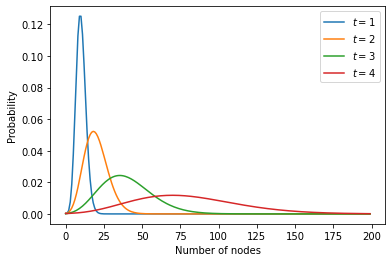

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Q = lambda x: np.exp(2*(x-1))
G0 = lambda x: x**5
N = 200
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)

tset = {1,2,3,4}
x = c.copy()
for t in range(max(tset)+1):
    if t in tset:
        pn = abs(np.fft.fft(G0(x))/N)
        plt.plot(n,pn, label=fr"$t = {t}$")
    x = Q(x)
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of nodes')
plt.show()

At each generation, the mean of the distribution increases by a factor $\lambda = 2$ and the distribution gets broader due to the stochasticity.

## Cumulative number of nodes

Sometimes, we care more about total size of the tree; for an epidemic process, it would be the total size of the outbreak.
To characterize, $m_t$, the cumulative number of node at time $t$, we need to consider the joint distribution $p_{n_t,m_t}$ with bivariate PGF

$$
\begin{align}
G_{t}(x,y)  &= \sum_{n_t=0}^\infty \sum_{m_t=0}^\infty p_{n_t,m_t} x^{n_t}y^{m_t} \;.
\end{align}
$$

:::{note}
Even though we sum from 0 to $\infty$ for both $n_t$ and $m_t$, the support of $p_{n_t,m_t}$ is not $\mathbb{N}^2$, since certain values of $n_t$ are impossible given $m_t$ (for instance, it is impossible to have $n_t > m_t$).
:::

The PGF $G_t(x,y)$ follows a very similar update pattern as $G_t(x)$. In fact, if we take any node at generation $t$, the joint PGF for the number of descendent *and* the cumulative number of node it produces is $Q(xy)$---

$$
\begin{align}
G_{t+1}(x,y)  &= \sum_{n_{t+1}=0}^\infty \sum_{m_{t+1}=0}^\infty p_{n_{t+1},m_{t+1}} x^{n_{t+1}}y^{m_{t+1}} \;, \\
G_{t+1}(x,y)  &= G_t(Q(xy),y) \;.
\end{align}
$$

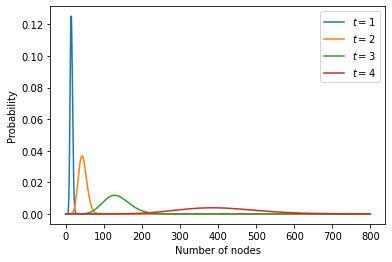

In [46]:
import numpy as np
import matplotlib.pyplot as plt

Q = lambda x: np.exp(2*(x-1))
G0 = lambda x: x**5
N = 800
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)

tset = {1,2,3,4}
x = c.copy()
for t in range(max(tset)+1):
    if t in tset:
        pn = abs(np.fft.fft(G0(x))/N)
        plt.plot(n,pn, label=fr"$t = {t}$")
    x = x*Q(x)
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Number of nodes')
plt.show()